# 도전 과제 : 영화 리뷰 감성 분석
---
## 1. 데이터셋 불러오기
- DataFrame을 정상적으로 불러오고, 대략적인 정보를 표시했는가?
  - 달성 기준: head, tail, columns, shape를 출력

In [34]:
# 1 데이터셋 불러오기
import pandas as pd

df = pd.read_csv("netflix_reviews.csv")

# shape  : 행과 열의 개수를 튜플로 반환
print("Shape of dataset :",df.shape)

print("Columns in the dataset : ",df.columns)

Shape of dataset : (117292, 8)
Columns in the dataset :  Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [35]:
# head() : 상단 5개 데이터
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,65ae4898-8007-47e3-92cd-ba06eac04574,Moosa Sam (Moosa Sam),This App Not Supporting My Device ROG3 Mobile!...,1,0,8.137.0 build 4 50942,2024-10-23 13:47:33,8.137.0 build 4 50942
1,3cc99dd8-81f1-47ce-8b78-18c29719a941,PixEndstar53,"I'm getting very tired, you guys keep logging ...",2,0,8.137.0 build 4 50942,2024-10-23 13:27:18,8.137.0 build 4 50942
2,1c639697-a825-4f11-b966-3e7cfb6eb292,JanCan1 GK,One of my go to channels..l was at least 4 mov...,5,0,8.132.2 build 18 50846,2024-10-23 13:26:51,8.132.2 build 18 50846
3,240cfd35-f94d-42d6-b145-154097dd2ce0,Brother Bear,"Poor scripts, Violent content",2,0,NaN,2024-10-23 13:19:59,NaN
4,c568b9f0-7b52-4dad-9b89-f57882014138,Riya Adak,Good,3,0,8.137.0 build 4 50942,2024-10-23 13:16:59,8.137.0 build 4 50942


In [36]:
# tail() : 하단 5개 데이터
df.tail()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117287,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117288,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117289,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117290,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117291,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


# 2. 데이터 전처리
- 텍스트 전처리를 lambda를 활용하여 완료했는가?
  - 달성 기준: apply 사용하여, 텍스트 전처리 완료

In [37]:
# describe() 로 분석
df.describe()

,score,thumbsUpCount
count,117292.000000,117292.000000
mean,2.818837,10.150599
std,1.704934,99.759861
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [38]:
# 결측치 확인
df.isnull().sum()

reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    17584
at                          0
appVersion              17584
dtype: int64

In [39]:
df[df['content'].isnull()] # content의 결측치 확인

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
7608,a73c931f-5cce-4863-b1ae-40101455f137,Maria Wiley,NaN,5,0,8.114.0 build 19 50680,2024-05-21 16:56:29,8.114.0 build 19 50680
7959,839d55ed-ba9e-4753-a178-5799b9f86ffc,Myris Guilanda,NaN,2,0,NaN,2024-05-19 13:52:42,NaN


* content는 영화 리뷰 감성 분석에 영향을 미치는 데이터이므로 점수와 맞게 처리하기
  * 예) 5점이면 good, 2점이면 bad

In [40]:
import re
def preprocess_text(text):
    
    if isinstance(text,float): # Pandas 에서 결측값(NaN)은 float 로 처리되므로 NaN 값 처리
        return ""
    '''
    df['content'] = df['content'].fillna(
    df['score'].replace({ # replace() 메서드로 점수에 해당하는 문자열로 매핑 --> 하려했으나 로딩?너무 오래걸려서 그냥 결측값 없애는걸로
        5: 'Excellent!',
        4: 'Good!',
        3: 'Average.',
        2: 'Could be better.',
        1: 'Terrible!'
    })
    )
    '''
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text) # text 중 문자+띄어쓰기를 제외한 모든것을 없앰
    text = re.sub(r'\d+','',text) # text 중 숫자가 하나 이상인 것 제거
    text = text.strip() # .strip() : 문자열 앞,뒤 공백 제거
    return text

In [41]:
# lambda 함수를 사용하여 content 열 전처리
df['content'] = df['content'].apply(lambda x: preprocess_text(x))

In [42]:
# 결측치 재확인
df.isnull().sum()

reviewId                    0
userName                    2
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    17584
at                          0
appVersion              17584
dtype: int64

## 3. feature 분석 (EDA)
-   리뷰의 평점 분포를 그래프로 표시했는가?
    -  달성 기준: seaborn과 matplotlib를 정상적으로 사용

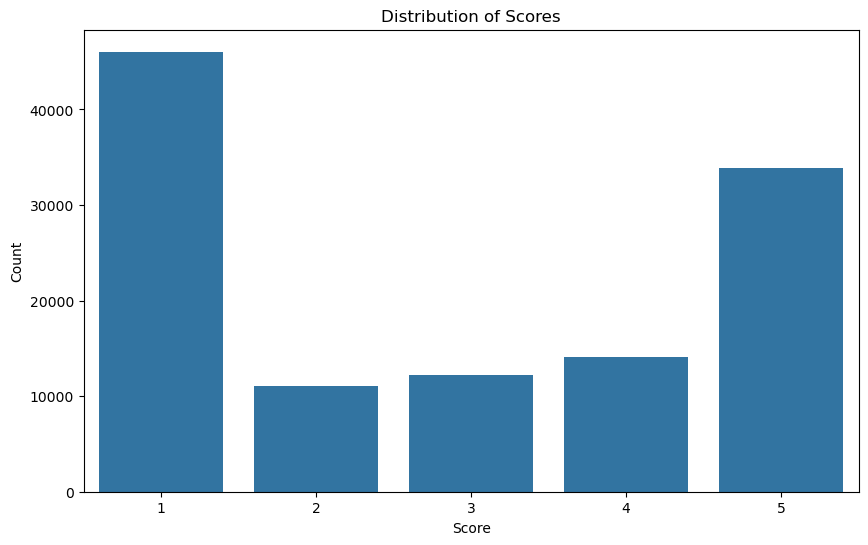

In [43]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

# 점수별 리뷰 개수 계산
score_counts=df['score'].value_counts().reset_index() # 값의 빈도 계산
score_counts.columns=['score','review_count'] 

# 리뷰 평점 분포 그래프 그리기
plt.figure(figsize=(10,6)) # plt.figure(figsize=(가로크기,세로크기))
sns.barplot(data=score_counts, x='score', y='review_count') # sns.barplot(x=x축카테고리,y=y축카테고리)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

## 4. 리뷰 예측 모델 학습시키기 (LSTM)
-  리뷰 예측 모델을 성공적으로 학습시키고 예측 결과를 표시했는가?
   - 달성 기준: LSTM 모델을 설계했으면 달성

In [44]:
import torch

In [45]:
import torchtext

In [46]:

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch.nn.utils.rnn as rnn_utils

# 데이터셋 클래스 정의
class ReviewDataset(Dataset): 
    def __init__(self, reviews, ratings, text_pipeline):
        self.reviews = reviews # 리뷰 텍스트의 리스트 (입력)
        self.ratings = ratings # 리뷰에 해당하는 평점 리스트 (출력)
        self.text_pipeline = text_pipeline # 텍스트 전처리 및 변환(리뷰텍스트가 모델의 입력 형식으로 변환)

    def __len__(self): # 데이터셋 크기 반환
        return len(self.reviews)

    def __getitem__(self, idx): 
        review = self.text_pipeline(self.reviews[idx]) # 리뷰가 모델이 이해할 수 있는 형식으로 변환됨
        rating = self.ratings[idx] # 지정된 인덱스에 해당하는 평점 가져옴
        return torch.tensor(review, dtype=torch.long), torch.tensor(rating, dtype=torch.long) # 텐서 형태로 리뷰와 평점 반환(dtype=torch.long 로 리뷰 변환되어 모델 입력으로 사용)

# 패딩을 위한 collate_fn 정의
# padding : 자연어 처리 등의 분야에서 불규칙한 길이의 시퀀스를 일정한 길이로 맞춤
def collate_fn(batch): # 배치에 포함될 샘플의 리스트를 받음
    # 샘플 분리
    reviews, ratings = zip(*batch) # batch : (review,rating) 형태의 튜플로 구성된 리스트. zip 으로 리뷰와 평점 분리시켜 review에 모든 리뷰, ratings 에 모든 평점이 포함되도록 함
    # 패딩 적용
    padded_reviews = rnn_utils.pad_sequence(reviews, batch_first=True) 
    # .pad_sequence : 서로 다른 길이의 시퀀스 동일한 길이로 패딩
    
    return padded_reviews, torch.stack(ratings)
# torch.stack 으로 ratings 를 하나의 텐서로 결합. 

# 텍스트 전처리 및 파이프라인 정의
tokenizer = get_tokenizer("basic_english")

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

# 데이터셋 준비
X = df['content'].values
y = df['score'].values

# 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# 단어 집합 생성
vocab = build_vocab_from_iterator(yield_tokens(X_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# 텍스트 파이프라인 정의
def text_pipeline(text):
    return vocab(tokenizer(text))

# 데이터셋 정의
train_dataset = ReviewDataset(X_train, y_train, text_pipeline)
test_dataset = ReviewDataset(X_test, y_test, text_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab) # 모델이 사용할 단어 집합의 크기
EMBED_DIM = 64 # 단어의 임베딩 차원. 각 단어는 64 차원 벡터로 표현됨
HIDDEN_DIM = 128 # 은닉층 크기 : 값이 클수록 복잡한 패턴 학습이 가능하지만 과적합 위험이 높아질 수 있음
OUTPUT_DIM = len(label_encoder.classes_)  # 모델의 출력층 : 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()

# SDG(확률적 경사 하강법) 옵티마이저 (주어진 학습률에 따라 각 에포크에서 파라미터 업데이트하여 손실함수 값 최소화)
# optim : PyTorch 제공 최적화 모듈로, 다양한 최적화 알고리즘 구현
# model.parameters() : 모든 파라미터(가중치와 편향)을 반환. 학습 중에 변경될 가중치와 편향 값 알려줌
optimizer = optim.SGD(model.parameters(), lr=0.01) # lr(학습률)=0.01 : 일반적으로 0.01을 자주 사용


def train_model(model, train_dataloader,criterion,optimizer,num_epochs):
    for epoch in range(num_epochs):
        model.train()
        total_loss=0
        
        for reviews, ratings in train_dataloader:
            optimizer.zero_grad()  # 이전 단계에서 계산된 기울기 초기화
            output=model(reviews)
            loss=criterion(output,ratings)
            loss.backward()
            optimizer.step()
            total_loss+=loss.item()
            
        avg_loss=total_loss /  len(train_dataloader)
        
        print(f'Epoch[{epoch+1}/{num_epochs}],Loss: {avg_loss:.4f}')
            
# 모델 학습
NUM_EPOCHS=10
train_model(model, train_dataloader, criterion, optimizer, NUM_EPOCHS)

Epoch[1/10],Loss: 1.4402


KeyboardInterrupt: 

In [15]:
# 필요한 라이브러리 불러오기
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch.nn.utils.rnn as rnn_utils

# 데이터셋 준비
X = df['content'].values
y = df['score'].values

# 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [16]:
# 텍스트 전처리 및 파이프라인 정의
tokenizer = get_tokenizer("basic_english") # "basic_english" 는 기본적인 영어 문법 규칙에 따라 단어를 분리하는 토크나이저임

def yield_tokens(data_iter): # 여러 텍스트를 처리할 때마다 각각의 토큰화된 리스트를 순차적으로 반환
    for text in data_iter:
        yield tokenizer(text) # 각 텍스트를 토크나이저를 통해 단어 리스트로 변환, 이를 제너레이터로 반환
        # yield : 함수가 호출될 때마다 현재 상태 기억, 다음 호출에서 다시 실행을 이어감


# 단어 집합 생성

# build_vacab_from_iterator : 주어진 데이터에서 단어 집합 생성 (단어를 나누는 이터레이터 :yield_tokens(X_train))을 받음
# specials=["<unk>"] : 특수 토큰 지정. unkown, 모델이 훈련 데이터에서 보지 못 한 단어 처리
# yield_toekns(X_train) : X_train 의 각 텍스트에 대해 토크나이징이 수행되어 단어 리스트로 변환됨. 각 리뷰에 포함된 단어 추출
vocab = build_vocab_from_iterator(yield_tokens(X_train), specials=["<unk>"])
# 기본 인덱스 설정 : 주어진 단어가 vocab 에 존재하지 않을 경우, "<unk>" 토큰의 인덱스를 반환(보지 못 한 단어 처리)
vocab.set_default_index(vocab["<unk>"])

# 텍스트 파이프라인 정의
def text_pipeline(text):
    return vocab(tokenizer(text))
    
# 데이터셋 정의
train_dataset = ReviewDataset(X_train, y_train, text_pipeline)
test_dataset = ReviewDataset(X_test, y_test, text_pipeline)

In [17]:
# 데이터셋 클래스 정의
class ReviewDataset(Dataset): 
    def __init__(self, reviews, ratings, text_pipeline):
        self.reviews = reviews # 리뷰 텍스트의 리스트 (입력)
        self.ratings = ratings # 리뷰에 해당하는 평점 리스트 (출력)
        self.text_pipeline = text_pipeline # 텍스트 전처리 및 변환(리뷰텍스트가 모델의 입력 형식으로 변환)

    def __len__(self): # 데이터셋 크기 반환
        return len(self.reviews)

    def __getitem__(self, idx): 
        review = self.text_pipeline(self.reviews[idx]) # 리뷰가 모델이 이해할 수 있는 형식으로 변환됨
        rating = self.ratings[idx] # 지정된 인덱스에 해당하는 평점 가져옴
        return torch.tensor(review, dtype=torch.long), torch.tensor(rating, dtype=torch.long) # 텐서 형태로 리뷰와 평점 반환(dtype=torch.long 로 리뷰 변환되어 모델 입력으로 사용)

In [18]:
# 패딩을 위한 collate_fn 정의
# padding : 자연어 처리 등의 분야에서 불규칙한 길이의 시퀀스를 일정한 길이로 맞춤
def collate_fn(batch): # 배치에 포함될 샘플의 리스트를 받음
    # 샘플 분리
    reviews, ratings = zip(*batch) # batch : (review,rating) 형태의 튜플로 구성된 리스트. zip 으로 리뷰와 평점 분리시켜 review에 모든 리뷰, ratings 에 모든 평점이 포함되도록 함
    # 패딩 적용
    padded_reviews = rnn_utils.pad_sequence(reviews, batch_first=True) 
    # .pad_sequence : 서로 다른 길이의 시퀀스 동일한 길이로 패딩
    
    return padded_reviews, torch.stack(ratings)
# torch.stack 으로 ratings 를 하나의 텐서로 결합. 


 # 데이터 로더 정의
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

In [19]:
# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab) # 모델이 사용할 단어 집합의 크기
EMBED_DIM = 64 # 단어의 임베딩 차원. 각 단어는 64 차원 벡터로 표현됨
HIDDEN_DIM = 128 # 은닉층 크기 : 값이 클수록 복잡한 패턴 학습이 가능하지만 과적합 위험이 높아질 수 있음
OUTPUT_DIM = len(label_encoder.classes_)  # 모델의 출력층 : 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()

# SDG(확률적 경사 하강법) 옵티마이저 (주어진 학습률에 따라 각 에포크에서 파라미터 업데이트하여 손실함수 값 최소화)
# optim : PyTorch 제공 최적화 모듈로, 다양한 최적화 알고리즘 구현
# model.parameters() : 모든 파라미터(가중치와 편향)을 반환. 학습 중에 변경될 가중치와 편향 값 알려줌
optimizer = optim.SGD(model.parameters(), lr=0.01) # lr(학습률)=0.01 : 일반적으로 0.01을 자주 사용



In [32]:

def train_model(model, train_dataloader,criterion,optimizer,num_epochs):
    for epoch in range(num_epochs):
        model.train()
        total_loss=0
        
        for reviews, ratings in train_dataloader:
            optimizer.zero_grad()  # 이전 단계에서 계산된 기울기 초기화
            output=model(reviews)
            loss=criterion(output,ratings)
            loss.backward()
            optimizer.step()
            total_loss+=loss.item()
            
        avg_loss=total_loss /  len(train_dataloader)
        print(f'Epoch[{epoch+1}/{num_epochs}],Loss: {avg_loss:.4f}')
            
# 모델 학습
NUM_EPOCHS=30
train_model(model, train_dataloader, criterion, optimizer, NUM_EPOCHS)

# 모델 평가 함수
def evaluate_model(model, test_dataloader):
    model.eval()
    correct=0
    total=0
    
    with torch.no_grad():
        for reviews, ratings in test_dataloader:
            output=model(reviews)
            predicted=output.argmax(1)
            total+=ratings.size(0)
            correct+=(predicted==ratings).sum().item()
            
    accuracy=correct/total
    print(f'Test Accuracy: {accuracy:.4f}')
    
# 모델 평가
evaluate_model(model, test_dataloader)

# 새로운 리뷰에 대한 예측
def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(review)).unsqueeze(0)  # 배치 차원 추가
        output = model(tensor_review)
        prediction = output.argmax(1).item()
        return label_encoder.inverse_transform([prediction])[0]

new_review = "This app is great but has some bugs."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')


NameError: name 'model' is not defined

In [15]:
# 모델 평가 함수
def evaluate_model(model, test_dataloader):
    model.eval()
    correct=0
    total=0
    
    with torch.no_grad():
        for reviews, ratings in test_dataloader:
            output=model(reviews)
            predicted=output.argmax(1)
            total+=ratings.size(0)
            correct+=(predicted==ratings).sum().item()
            
    accuracy=correct/total
    print(f'Test Accuracy: {accuracy:.4f}')
    
# 모델 평가
evaluate_model(model, test_dataloader)

# 새로운 리뷰에 대한 예측
def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(review)).unsqueeze(0)  # 배치 차원 추가
        output = model(tensor_review)
        prediction = output.argmax(1).item()
        return label_encoder.inverse_transform([prediction])[0]

new_review = "The features are fantastic, and the interface is very user-friendly."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')

NameError: name 'model' is not defined

In [16]:
# 5 NLP 이용해 감성 분석
import nltk
from textblob import TextBlob
import pandas as pd

In [17]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

In [18]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [19]:
# 감성 분석을 df['content']에 적용하여 sentiment 열 생성
df['sentiment'] = df['content'].apply(get_sentiment)

# sentiment 열의 데이터 타입 확인 및 문자열 처리
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# sentiment 값을 바탕으로 긍정, 부정, 중립 분류
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

# 결과 출력
result = df[['content', 'score', 'sentiment_label']]
result

,content,score,sentiment_label
0,this app not supporting my device rog mobile k...,1,positive
1,im getting very tired you guys keep logging me...,2,negative
2,one of my go to channelsl was at least movies...,5,neutral
3,poor scripts violent content,2,negative
4,good,3,positive
...,...,...,...
117287,i really like it there are so many movies and ...,5,positive
117288,i love netflix i always enjoy my time using it,5,positive
117289,sound quality is very slow of movies,1,neutral
117290,rate is very expensive bcos we see netflix sun...,1,negative


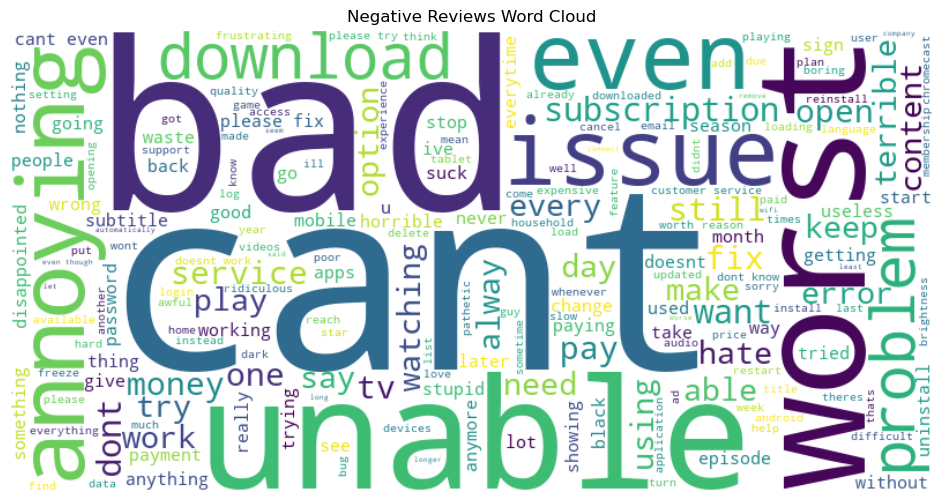

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 부정적인 리뷰 필터링
negative_reviews = ' '.join(df[df['sentiment_label'] =="negative"]['content'])

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','account','netflix','use','im','new','will','shows','video','screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies'])

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

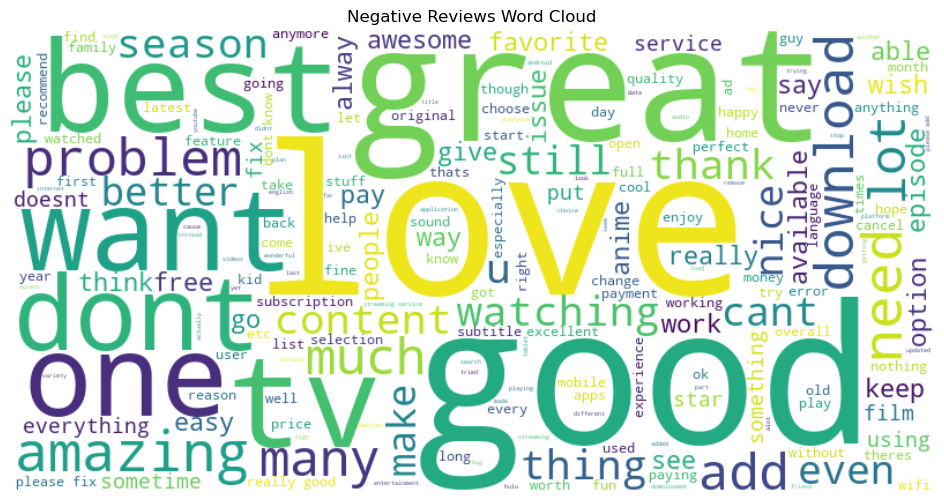

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 긍정적 리뷰 필터링
negative_reviews = ' '.join(df[df['sentiment_label'] =="positive"]['content'])

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','account','netflix','use','im','new','will','shows','video','screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies'])

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()